<center><h1>Subramanyam_Shruti_HW5</h1></center>
<br>
<br>

<h4>Name: Shruti Subramanyam</h4>
<h4>Github Username: Shruti-Subramanyam</h4>

## 1. Decision Trees as Interpretable Models

Import packages

In [21]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.7 MB 5.3 MB/s eta 0:00:19
   ---------------------------------------- 0.5/99.7 MB 6.6 MB/s eta 0:00:16
   ---------------------------------------- 0.7/99.7 MB 5.7 MB/s eta 0:00:18
   ---------------------------------------- 1.0/99.7 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.4/99.7 MB 5.8 MB/s eta 0:00:17
    --------------------------------------- 1.9/99.7 MB 6.6 MB/s eta 0:00:15
    --------------------------------------- 2.4/99.7 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 2.8/99.7 MB 7.5 MB/s eta 0:00:13
   - --------------------------

In [22]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

### (a) Obtain Data

Get the Accute Inamations Data Set

In [3]:
df = pd.read_csv('../data/diagnosis.data',encoding="utf-16",sep='\t', decimal=',',header=None)
C_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder','Nephritis of renal pelvis origin']
df.columns=C_names
df

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### (b) Build a decision tree

In [4]:
df['Occurrence of nausea'] = df['Occurrence of nausea'].map({'yes': 1, 'no': 0})
df['Lumbar pain'] = df['Lumbar pain'].map({'yes': 1, 'no': 0})
df['Urine pushing'] = df['Urine pushing'].map({'yes': 1, 'no': 0})
df['Micturition pains'] = df['Micturition pains'].map({'yes': 1, 'no': 0})
df['Burning of urethra, itch, swelling of urethra outlet'] = df['Burning of urethra, itch, swelling of urethra outlet'].map({'yes': 1, 'no': 0})
df['Inflammation of urinary bladder'] = df['Inflammation of urinary bladder'].map({'yes': 1, 'no': 0})
df['Nephritis of renal pelvis origin'] = df['Nephritis of renal pelvis origin'].map({'yes': 1, 'no': 0})

In [5]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2:] 

In [7]:
X

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet"
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


In [8]:
y

,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
115,0,1
116,0,0
117,0,1
118,0,1


In [11]:
dtclassifier = DecisionTreeClassifier(criterion='entropy')
dtclassifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

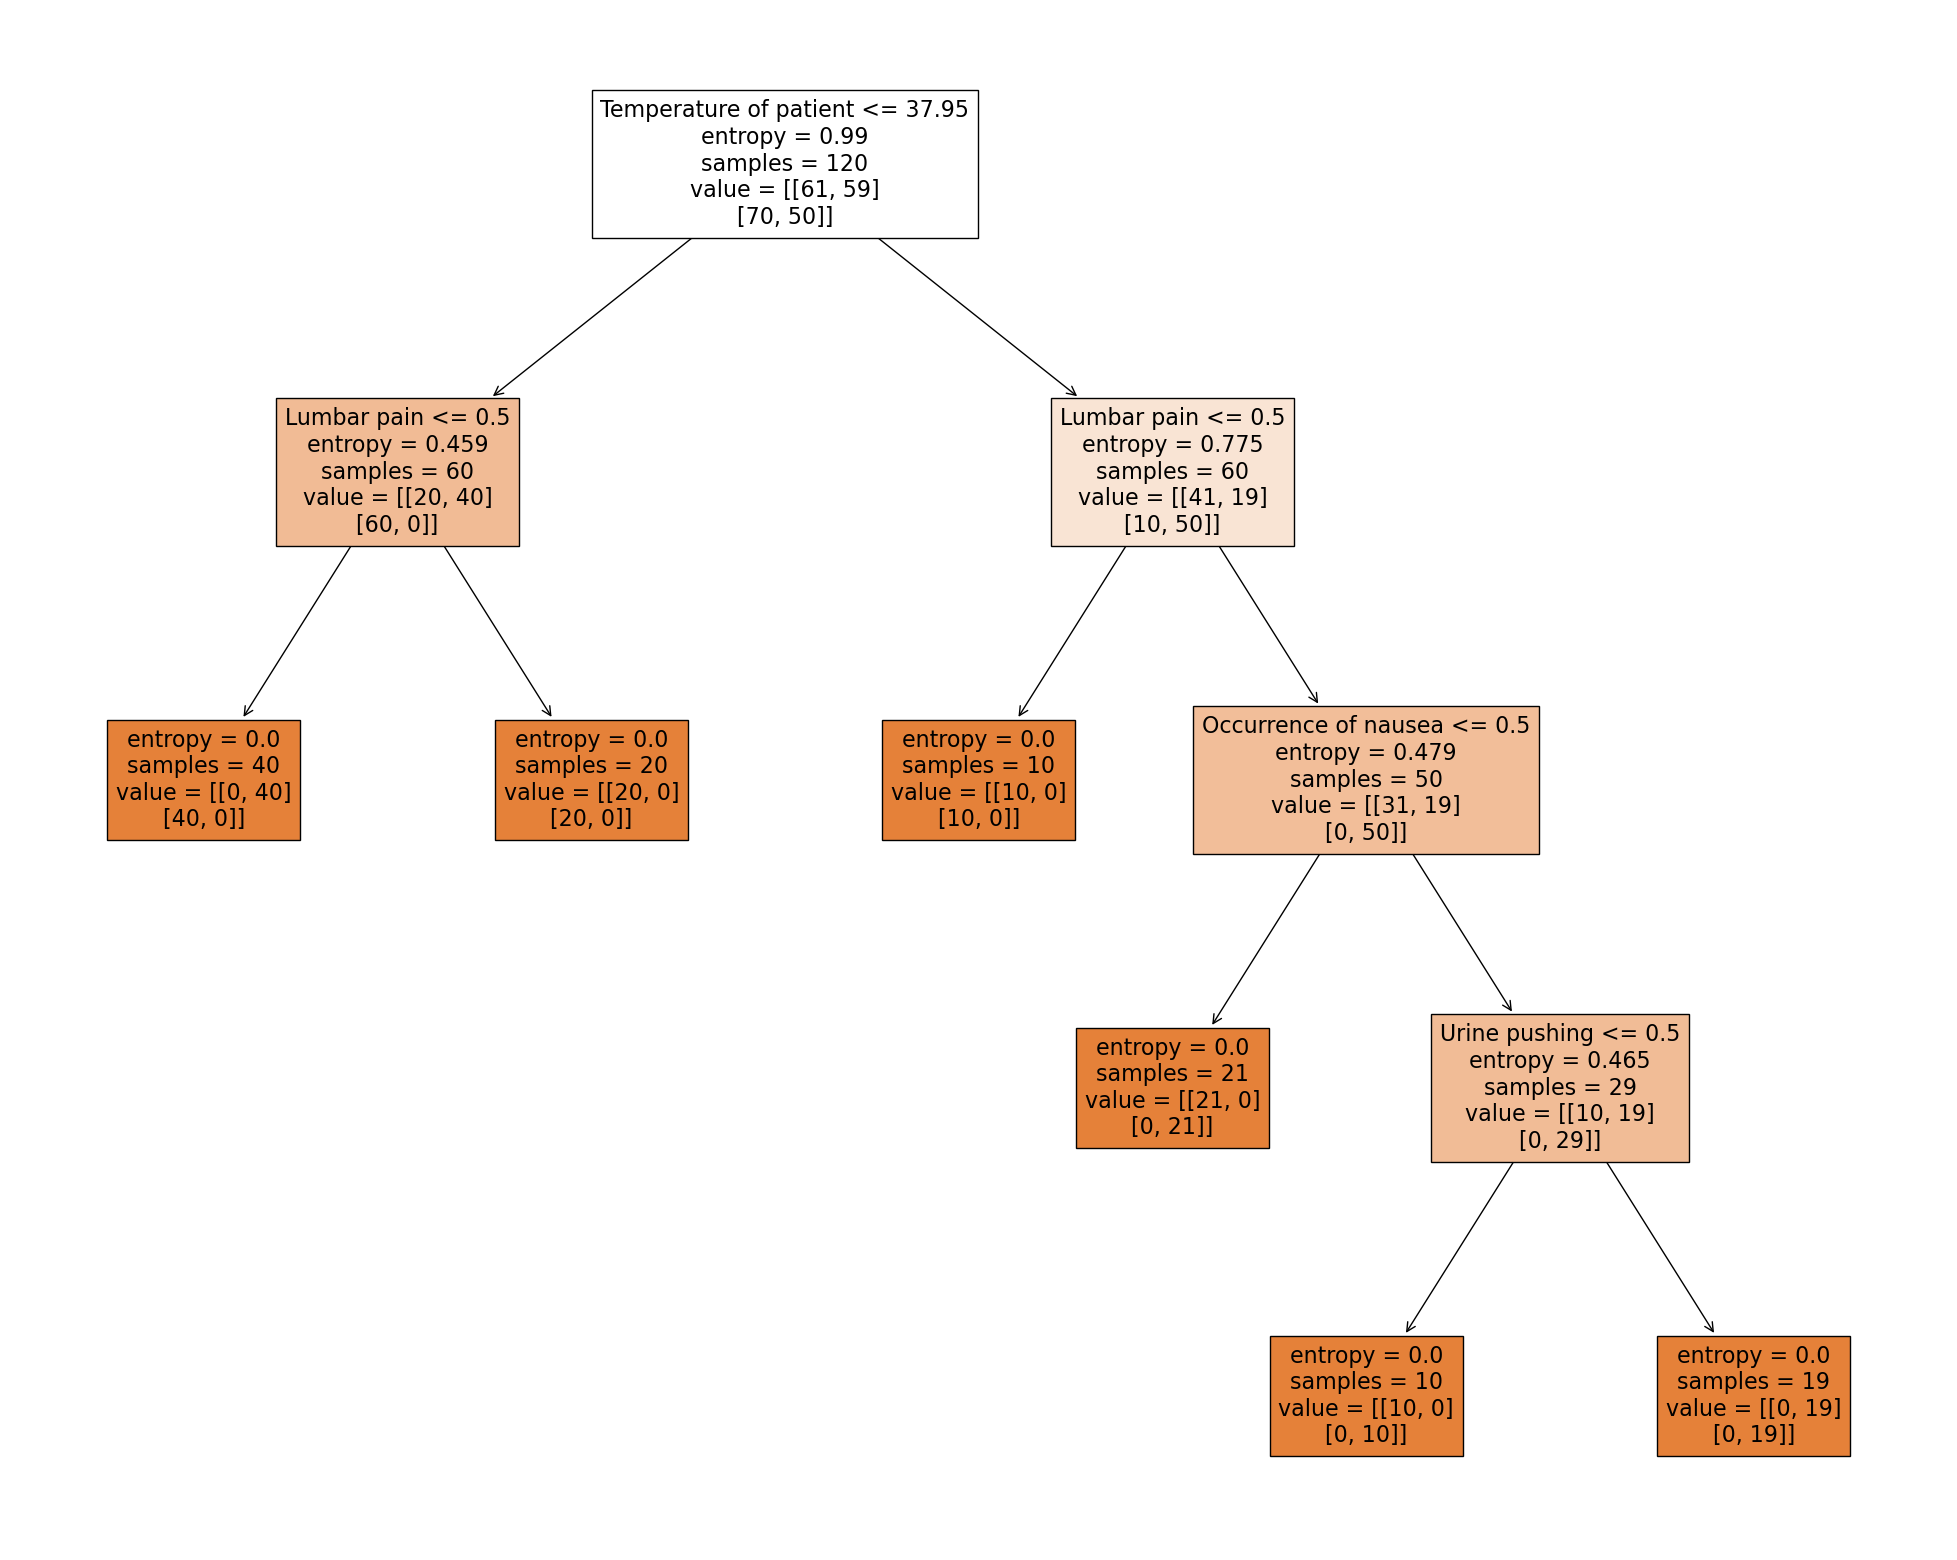

In [12]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtclassifier,feature_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'],filled=True)
plt.show()

### (c) Convert the decision rules

In [13]:
def printcondition(node, depth,ftemp,tree_):
    indent = "    " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = ftemp[node]
        threshold = tree_.threshold[node]
        print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
        printcondition(tree_.children_left[node], depth + 1,ftemp,tree_)
        print("{} elif {} > {}:".format(indent, name, np.round(threshold,2)))
        printcondition(tree_.children_right[node], depth + 1,ftemp,tree_)
    else:
        print("{}return {}".format(indent, tree_.value[node]))

In [14]:
def treeToifthen(tree, fname):
    tree_ = tree.tree_
    ftemp = [fname[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    fname = [f.replace(" ", "_")[:-5] for f in fname]
    print("def predict({}):".format(", ".join(fname)))
    printcondition(0, 1,ftemp,tree_)

In [15]:
treeToifthen(dtclassifier, ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'])

def predict(Temperature_of_pa, Occurrence_of_n, Lumbar, Urine_pu, Micturition_, Burning_of_urethra,_itch,_swelling_of_urethra_o):
    if Temperature of patient <= 37.95:
        if Lumbar pain <= 0.5:
            return [[ 0. 40.]
 [40.  0.]]
         elif Lumbar pain > 0.5:
            return [[20.  0.]
 [20.  0.]]
     elif Temperature of patient > 37.95:
        if Lumbar pain <= 0.5:
            return [[10.  0.]
 [10.  0.]]
         elif Lumbar pain > 0.5:
            if Occurrence of nausea <= 0.5:
                return [[21.  0.]
 [ 0. 21.]]
             elif Occurrence of nausea > 0.5:
                if Urine pushing <= 0.5:
                    return [[10.  0.]
 [ 0. 10.]]
                 elif Urine pushing > 0.5:
                    return [[ 0. 19.]
 [ 0. 19.]]


### (d) Cost complex pruning for minimal decision tree

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [17]:
X_train

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet"
30,37.1,0,0,1,0,0
53,37.8,0,0,1,1,1
118,41.5,0,1,1,0,1
9,36.6,0,0,1,1,1
33,37.2,0,0,1,0,0
...,...,...,...,...,...,...
106,41.1,1,1,1,1,0
14,36.7,0,1,0,0,0
92,40.7,1,1,1,1,1
51,37.7,0,0,1,0,0


In [18]:
y_train

,Inflammation of urinary bladder,Nephritis of renal pelvis origin
30,1,0
53,1,0
118,0,1
9,1,0
33,1,0
...,...,...
106,1,1
14,0,0
92,1,1
51,1,0


In [23]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train,y_train)
y_pred = dt1.predict(X_test)
print('Test accuracy of Decision Tree is:',accuracy_score(y_test,y_pred))
print('Test error of Decision Tree is:',1-accuracy_score(y_test,y_pred))

Test accuracy of Decision Tree is: 1.0
Test error of Decision Tree is: 0.0


In [24]:
path = dt1.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
test_acc=[]
for i in alphas:
    temp=[]
    dt1=DecisionTreeClassifier(ccp_alpha=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    temp.append(i)
    temp.append(accuracy_score(y_test,y_pred))
    test_acc.append(temp)
test_acc

[[0.0, 1.0],
 [0.048639455782312935, 0.8333333333333334],
 [0.08821389020724565, 0.7777777777777778],
 [0.10569105691056911, 0.5833333333333334],
 [0.20172997351710586, 0.25]]

#### As we can observe, the highest testing accuracy is 1 for alpha=0.

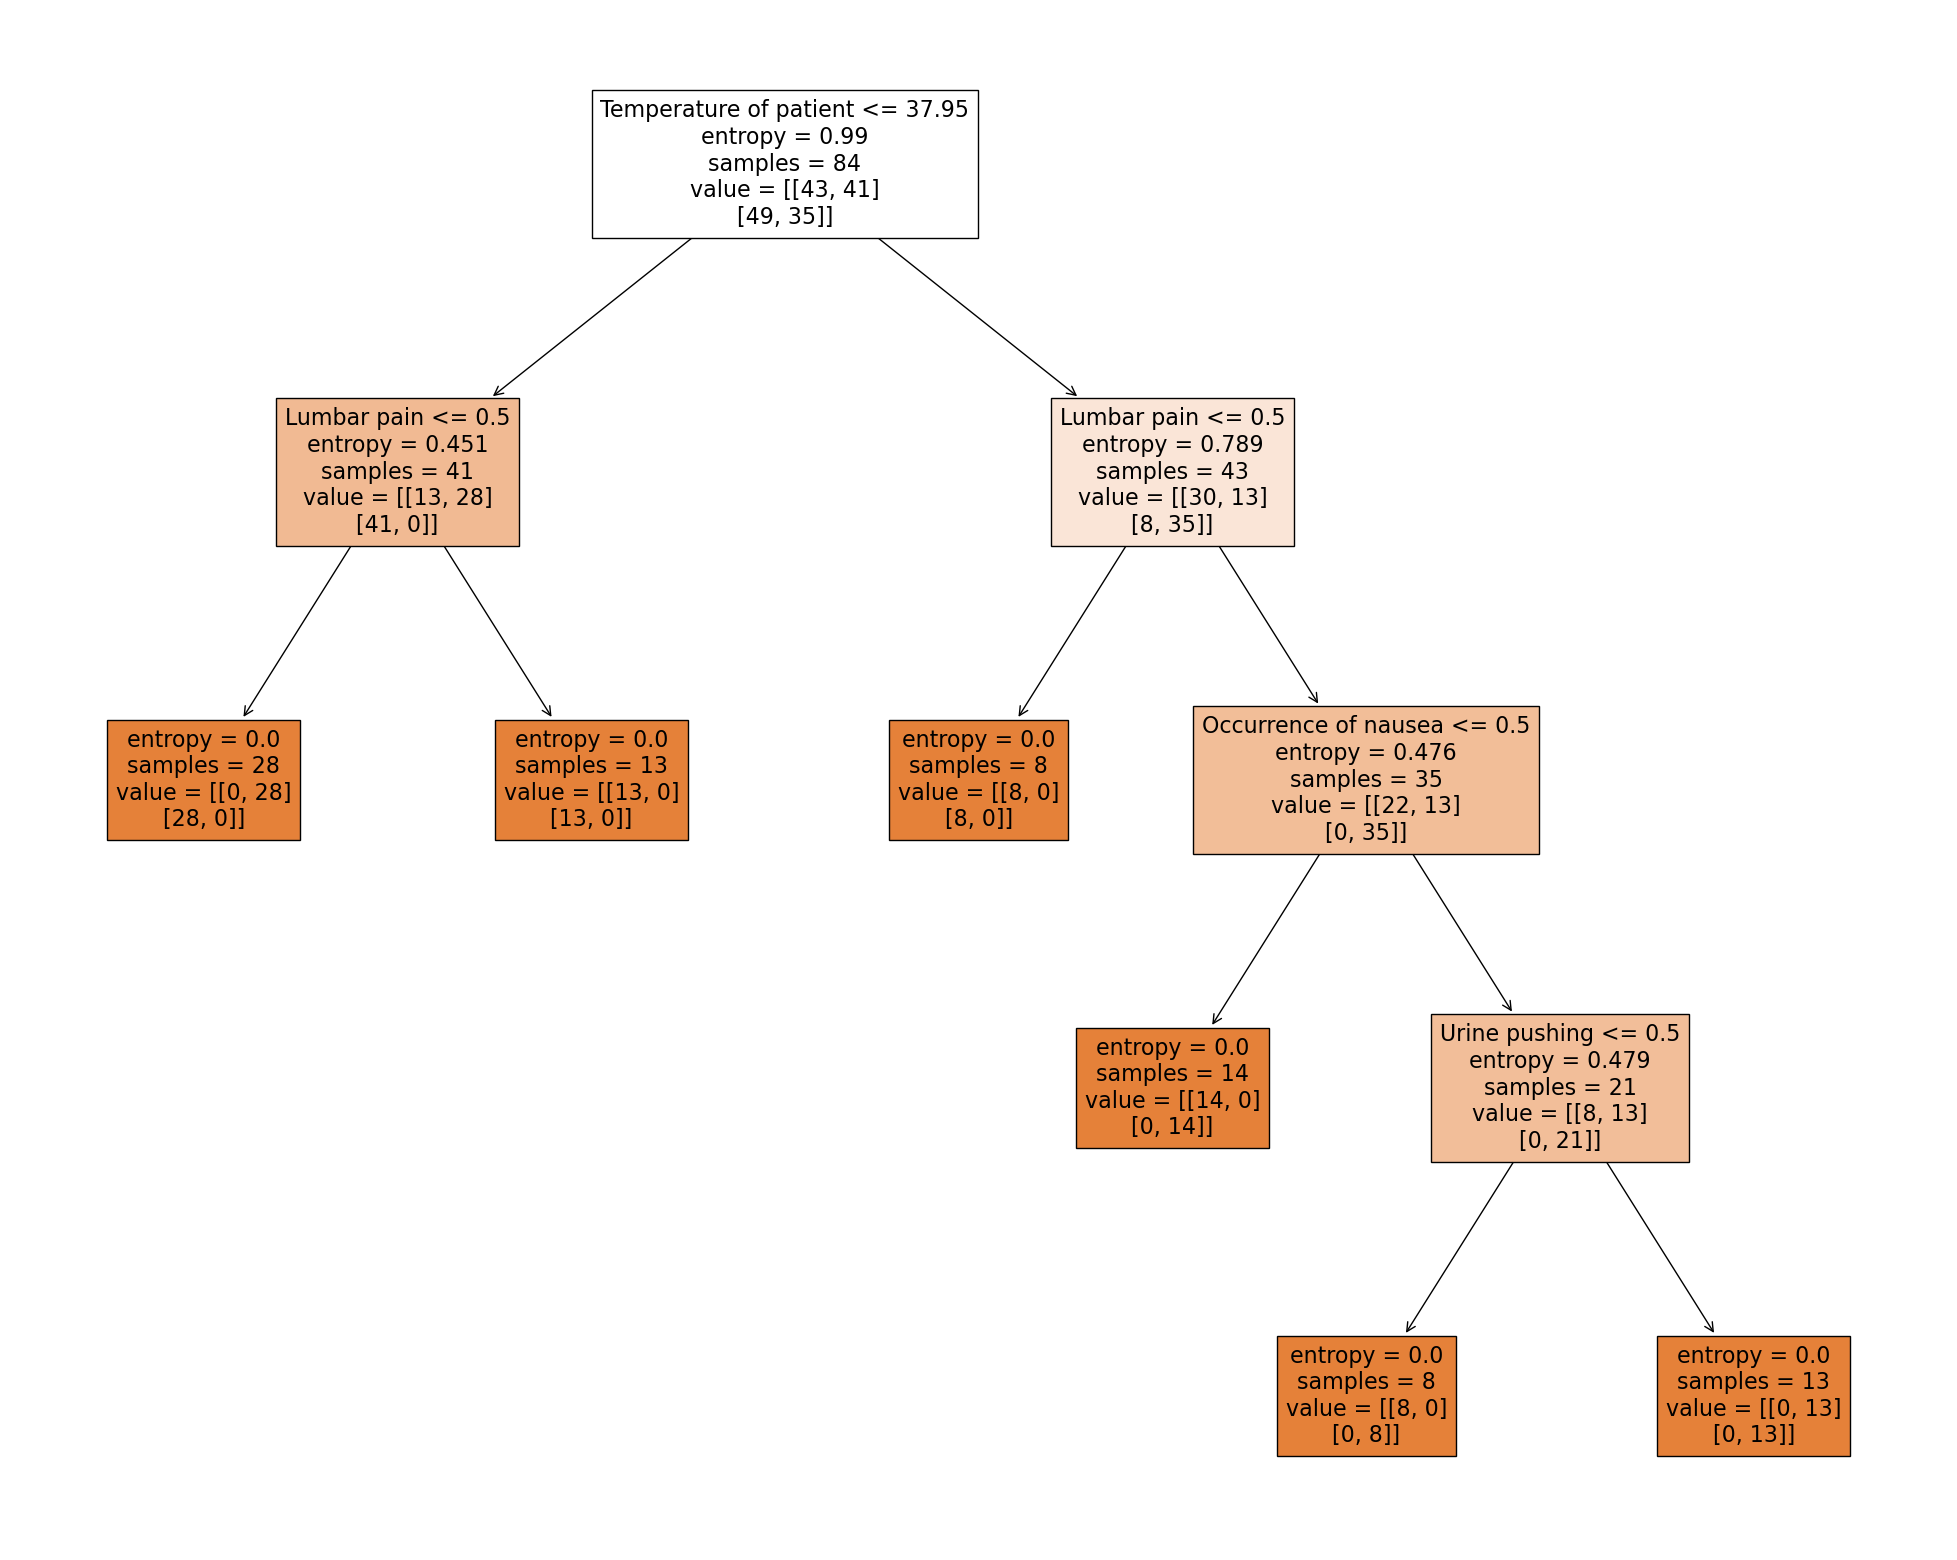

In [25]:
dt1 = DecisionTreeClassifier(ccp_alpha = 0,criterion='entropy')
dt1.fit(X_train,y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt1,feature_names = ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'],filled=True)
plt.show()

In [26]:
def printcondition1(left, right, threshold, features, node,value, depth=0):
    indent = "  " * depth
    if (threshold[node] != -2):
        print (indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
        if left[node] != -1:
            printcondition1(left, right, threshold, features, left[node],value, depth+1)
            print (indent,"} elif {")
            if right[node] != -1:
                printcondition1(left, right, threshold, features, right[node],value, depth+1)
            print (indent,"}")
    else:
        print (indent,"return " + str(value[node]))

In [27]:
def treeToifelse1(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    printcondition1(left, right, threshold, features, 0,value)

In [28]:
treeToifelse1(dt1, ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'])

 if ( Temperature of patient <= 37.95000076293945 ) {
   if ( Lumbar pain <= 0.5 ) {
     return [[ 0. 28.]
 [28.  0.]]
   } elif {
     return [[13.  0.]
 [13.  0.]]
   }
 } elif {
   if ( Lumbar pain <= 0.5 ) {
     return [[8. 0.]
 [8. 0.]]
   } elif {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[14.  0.]
 [ 0. 14.]]
     } elif {
       if ( Urine pushing <= 0.5 ) {
         return [[8. 0.]
 [0. 8.]]
       } elif {
         return [[ 0. 13.]
 [ 0. 13.]]
       }
     }
   }
 }


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [29]:
attr = []
with open('../data/communities.names', 'r') as file:
    data = file.readlines()
    for row in data:
        if row.startswith('@attribute'):
            attr.append(row.split(" ")[1])
print('Total attributes is {}'.format(len(attr)))

Total attributes is 128


In [30]:
commdf = pd.read_csv('../data/communities.data',header = None,names=attr, na_values='?')
commdf

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [31]:
CommTrain = commdf.iloc[0:1495,:]
CommTest = commdf.iloc[1495:,:].reset_index(drop=True)

In [32]:
CommTrain

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [33]:
CommTest

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
2,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,42,17.0,25112.0,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
4,51,683.0,48952.0,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
495,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
496,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
497,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


### (b) Missing values

In [34]:
# According to the names file, Attribute Information: (122 predictive, 5 non-predictive, 1 goal), hence the first 5 columns are ignored.
train = CommTrain.iloc[:, 5:]
test = CommTest.iloc[:, 5:]
comdf1 = commdf.iloc[:, 5:]

In [35]:
# Dealing with missing values
missingvalue = {}
for col in comdf1.columns:
    null_count = pd.isnull(comdf1[col]).sum()
    if(null_count > 0):
        missingvalue[col] = null_count
missingvalue

{'OtherPerCap': 1,
 'LemasSwornFT': 1675,
 'LemasSwFTPerPop': 1675,
 'LemasSwFTFieldOps': 1675,
 'LemasSwFTFieldPerPop': 1675,
 'LemasTotalReq': 1675,
 'LemasTotReqPerPop': 1675,
 'PolicReqPerOffic': 1675,
 'PolicPerPop': 1675,
 'RacialMatchCommPol': 1675,
 'PctPolicWhite': 1675,
 'PctPolicBlack': 1675,
 'PctPolicHisp': 1675,
 'PctPolicAsian': 1675,
 'PctPolicMinor': 1675,
 'OfficAssgnDrugUnits': 1675,
 'NumKindsDrugsSeiz': 1675,
 'PolicAveOTWorked': 1675,
 'PolicCars': 1675,
 'PolicOperBudg': 1675,
 'LemasPctPolicOnPatr': 1675,
 'LemasGangUnitDeploy': 1675,
 'PolicBudgPerPop': 1675}

In [36]:
column = list(missingvalue.keys())[0]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
comdf1[[column]] = imp.fit_transform(comdf1[[column]])

In [37]:
# Check the missing values after data imputation
missingvaluecheck = {}
for col in comdf1.columns:
    null_count = pd.isnull(comdf1[col]).sum()
    if(null_count > 0):
        missingvaluecheck[col] = null_count
missingvaluecheck

{'LemasSwornFT': 1675,
 'LemasSwFTPerPop': 1675,
 'LemasSwFTFieldOps': 1675,
 'LemasSwFTFieldPerPop': 1675,
 'LemasTotalReq': 1675,
 'LemasTotReqPerPop': 1675,
 'PolicReqPerOffic': 1675,
 'PolicPerPop': 1675,
 'RacialMatchCommPol': 1675,
 'PctPolicWhite': 1675,
 'PctPolicBlack': 1675,
 'PctPolicHisp': 1675,
 'PctPolicAsian': 1675,
 'PctPolicMinor': 1675,
 'OfficAssgnDrugUnits': 1675,
 'NumKindsDrugsSeiz': 1675,
 'PolicAveOTWorked': 1675,
 'PolicCars': 1675,
 'PolicOperBudg': 1675,
 'LemasPctPolicOnPatr': 1675,
 'LemasGangUnitDeploy': 1675,
 'PolicBudgPerPop': 1675}

In [38]:
comdf1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [39]:
comdf1.isnull().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 123, dtype: int64

In [40]:
# Dropping other missing value columns
comdf2 = comdf1.dropna(axis=1)
train1 = comdf2.iloc[:1495, :]
test1 = comdf2.iloc[1495:, :].reset_index(drop = True)

In [41]:
comdf2

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [42]:
train1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.61,0.46,0.75,0.72,0.78,0.02,0.14,0.22,0.00,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.60,0.44,0.39,0.68,0.67,0.07,0.40,0.14,0.61,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.02,0.86,0.61,0.77,0.81,0.03,0.12,0.01,0.00,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.78,0.63,0.70,0.82,0.08,0.15,0.02,0.00,0.03


In [43]:
test1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.33,0.45,0.57,0.56,0.74,0.01,0.23,0.73,0.00,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.17,0.45,0.52,0.59,0.57,0.01,0.18,0.02,0.00,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.19,0.47,0.37,0.38,0.49,0.01,0.18,0.00,0.00,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.10,0.62,0.70,0.75,0.64,0.06,0.13,0.16,0.00,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.22,0.33,0.16,0.06,0.27,0.03,0.23,0.06,0.00,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


### (c) Plot a correlation matrix

Text(0.5, 1.0, 'Correlation Matrix Plot (Heatmap)')

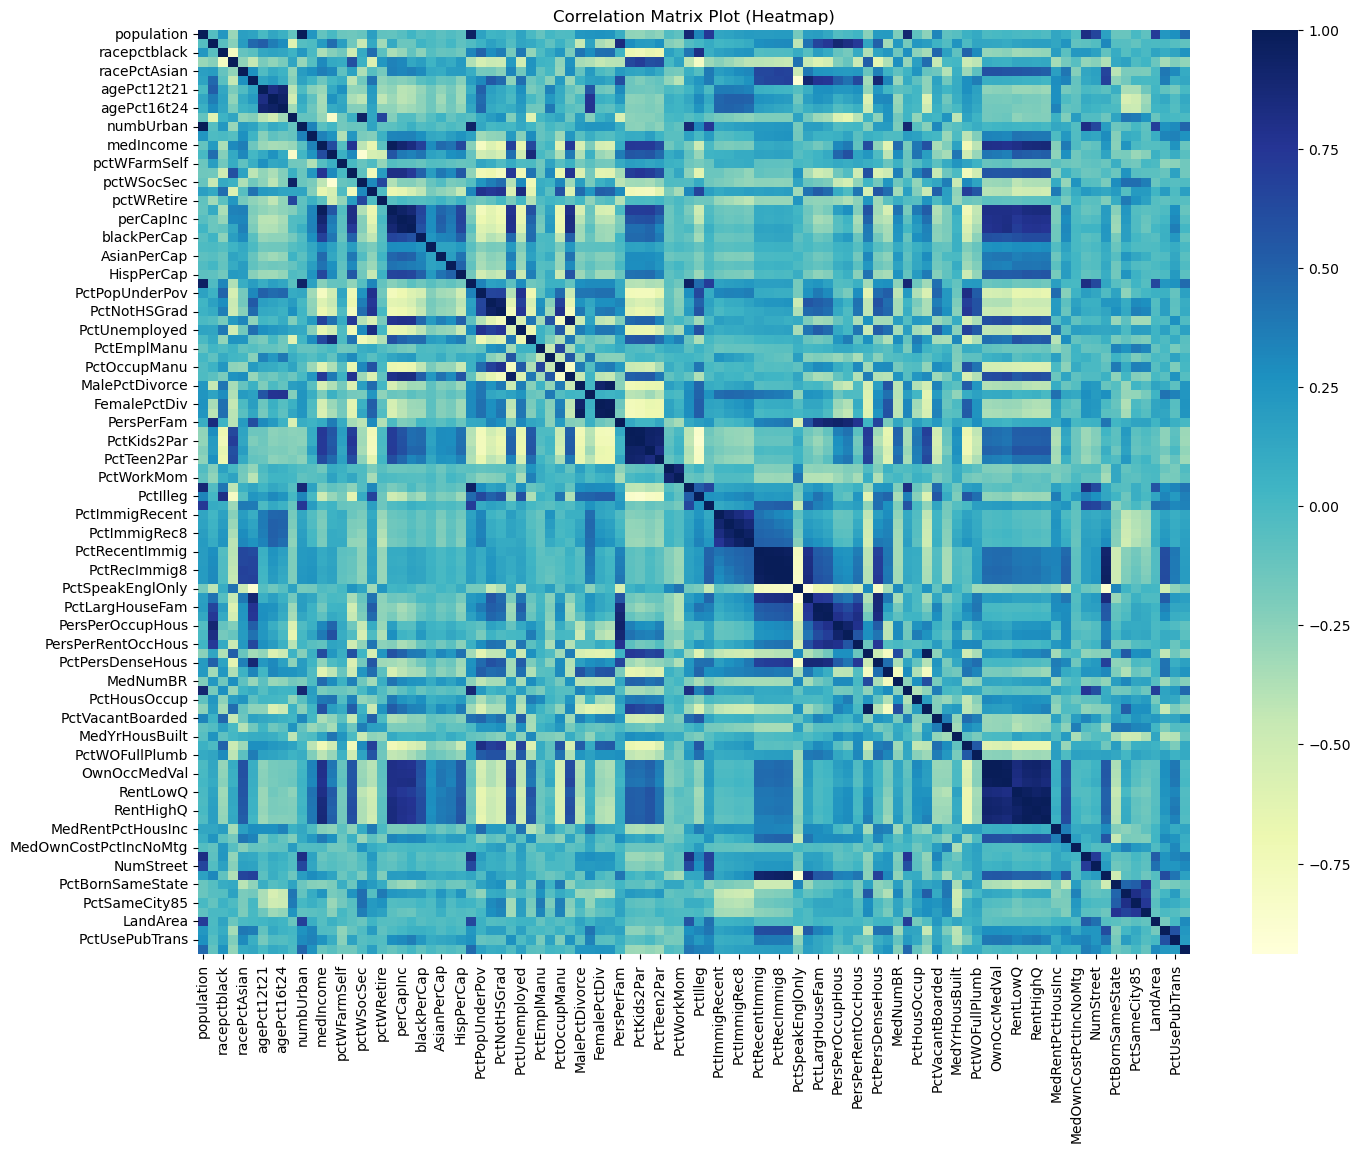

In [44]:
fdata = comdf2[comdf2.columns[:-1]]
plt.figure(figsize=(16, 12))
sns.heatmap(fdata.corr(),cmap="YlGnBu").set_title('Correlation Matrix Plot (Heatmap)')

In [45]:
corr = comdf2.corr()
corr.style.background_gradient(cmap='YlGnBu')

### (d) Calculate the Coefficient of Variation CV

In [46]:
coeffVarCV = comdf2.apply(lambda x: np.std(x) / np.mean(x), axis=0)
coeffVarCV

population             2.202950
householdsize          0.353210
racepctblack           1.410567
racePctWhite           0.323700
racePctAsian           1.358821
                         ...   
LandArea               1.677611
PopDens                0.871968
PctUsePubTrans         1.416317
LemasPctOfficDrugUn    2.554625
ViolentCrimesPerPop    0.978769
Length: 101, dtype: float64

In [47]:
len(coeffVarCV)

101

In [48]:
for i in range(len(coeffVarCV)):
    print(coeffVarCV.index[i],":",coeffVarCV[i])

population : 2.202949933865333
householdsize : 0.3532097004119036
racepctblack : 1.4105665605340316
racePctWhite : 0.32370036336013597
racePctAsian : 1.3588213380942602
racePctHisp : 1.6138729571484
agePct12t21 : 0.36574812216270963
agePct12t29 : 0.29061998738004713
agePct16t24 : 0.49503633617805404
agePct65up : 0.4233355166105005
numbUrban : 2.001241633513716
pctUrban : 0.6386886583257841
medIncome : 0.5796080008727302
pctWWage : 0.3276278742640529
pctWFarmSelf : 0.6998545594658844
pctWInvInc : 0.35914985569917435
pctWSocSec : 0.3684202133633646
pctWPubAsst : 0.6988551987450088
pctWRetire : 0.3495513990736714
medFamInc : 0.5275995387856811
perCapInc : 0.5454965924474844
whitePerCap : 0.5074249049035475
blackPerCap : 0.5893211744649136
indianPerCap : 0.8094820310422649
AsianPerCap : 0.60604182734043
OtherPerCap : 0.6704763858174293
HispPerCap : 0.4738408572341726
NumUnderPov : 2.3043916660118087
PctPopUnderPov : 0.7537910884956593
PctLess9thGrade : 0.6754307871530845
PctNotHSGrad : 0.5

### (e) Scatter plots and box plots for highest CV features

In [49]:
no_features = int(np.floor(np.sqrt(128)))
highCV = coeffVarCV.sort_values(ascending=False)[:no_features]
highCV

NumStreet              4.406597
NumInShelters          3.484607
NumIlleg               2.993446
NumImmig               2.899770
LemasPctOfficDrugUn    2.554625
NumUnderPov            2.304392
population             2.202950
numbUrban              2.001242
HousVacant             1.958288
LandArea               1.677611
racePctHisp            1.613873
dtype: float64

Text(0.5, 0.98, 'Scatter plots of √128c features with highest CV')

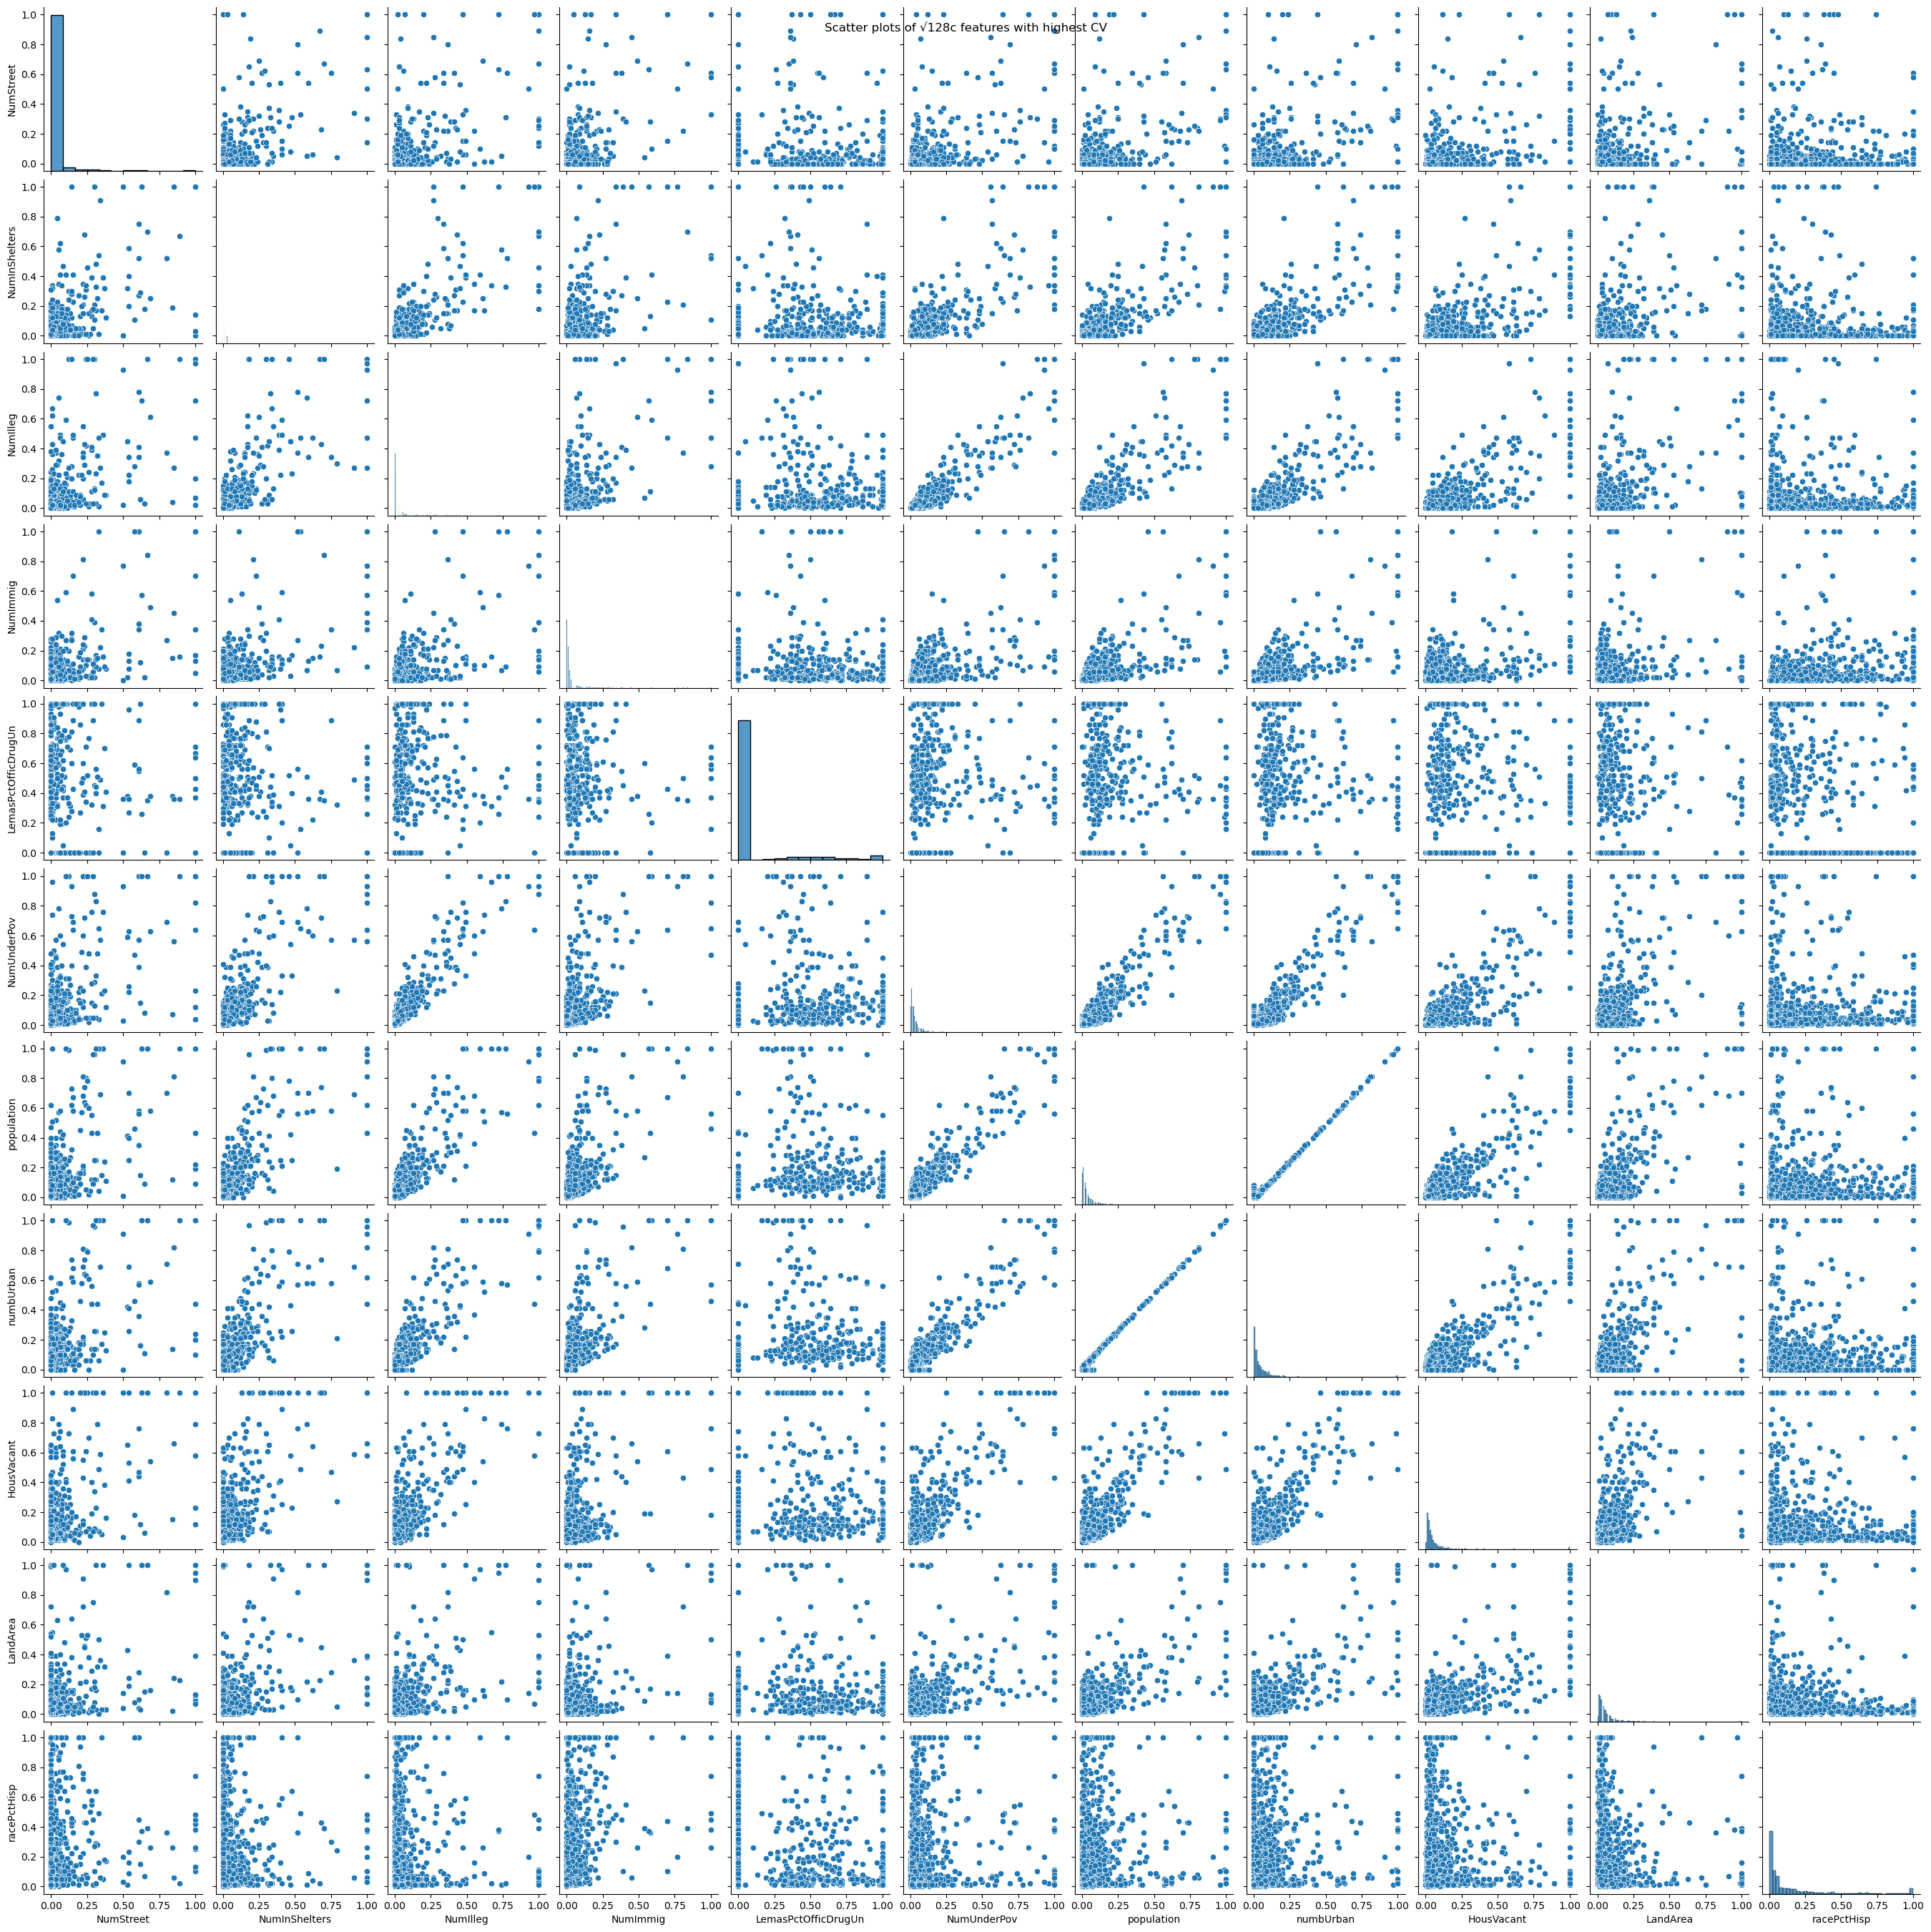

In [50]:
# Scatter plot
plot = sns.pairplot(fdata[list(highCV.index)])
plot.fig.suptitle("Scatter plots of √128c features with highest CV")

<AxesSubplot:>

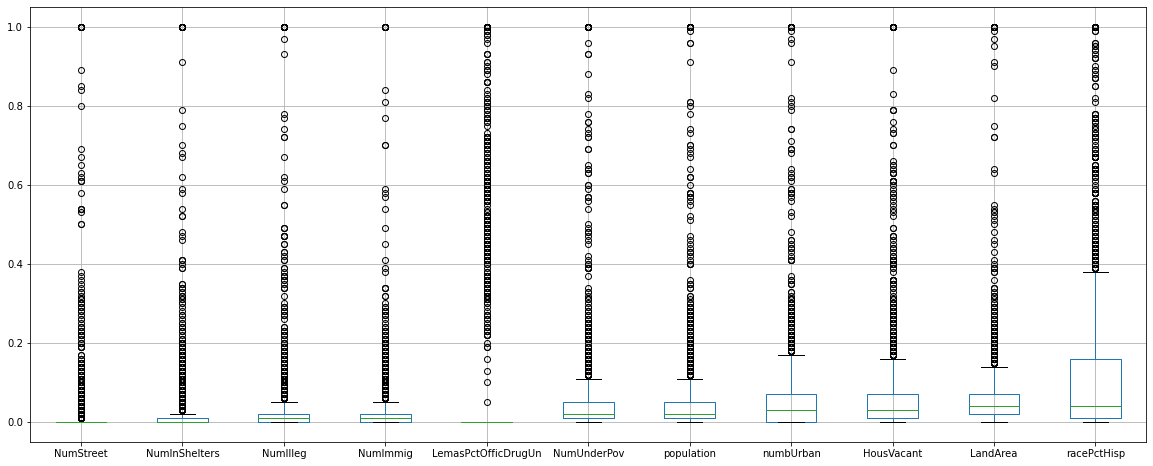

In [46]:
fdata[list(highCV.index)].boxplot(figsize=(20,8))

### Conclusion:
__We cannot draw any major conclusions about significance of these features, just by the scatter plots. But a positive linear correlation can be observed between 'population' and 'numbUrban' features.__

### (f) Fit a linear model

In [51]:
X_train = train1[train1.columns[:-1]]
y_train = train1[train1.columns[-1]]

X_test = test1[test1.columns[:-1]]
y_test = test1[test1.columns[-1]]

In [52]:
X_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.00,0.61,0.46,0.75,0.72,0.78,0.02,0.14,0.22,0.00
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.03,0.60,0.44,0.39,0.68,0.67,0.07,0.40,0.14,0.61
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.00,0.02,0.86,0.61,0.77,0.81,0.03,0.12,0.01,0.00
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.00,0.08,0.78,0.63,0.70,0.82,0.08,0.15,0.02,0.00


In [53]:
y_train

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: ViolentCrimesPerPop, Length: 1495, dtype: float64

In [54]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test error for Linear model using least squares to training set = ', mse)
rsq_score = r2_score(y_test, y_pred)
print('R2 score = ', rsq_score)

Test error for Linear model using least squares to training set =  0.017844644706157823
R2 score =  0.6247601321388443


### (g) Fit a ridge regression model

In [55]:
alpha = [10 ** i for i in range(-4, 4)]
cvf = RidgeCV(alphas = alpha,cv = KFold(5, shuffle=True, random_state=42)).fit(X_train, y_train)
best_ridge_alpha = cvf.alpha_
print("The best alpha selected by cross validation = ", best_ridge_alpha)

# Refiting the model using ridge regression with best alpha
cvfRefit = Ridge(alpha = best_ridge_alpha)
cvfRefit.fit(X_train, y_train)
y_pred = cvfRefit.predict(X_test)
print("Test error for Ridge regression model = ",mean_squared_error(y_test, y_pred))
print("R2 score = ", r2_score(y_test, y_pred))

The best alpha selected by cross validation =  1.0
Test error for Ridge regression model =  0.017502306931091567
R2 score =  0.6319588622674086


### (h) Fit a LASSO model

In [56]:
# Without standardized features
reg  = LassoCV(alphas = alpha,cv = KFold(5, shuffle=True, random_state=42)).fit(X_train, y_train)
best_lasso_alpha = reg.alpha_
print("The best alpha selected by cross validation = ", best_lasso_alpha)

regRefit = Lasso(alpha = best_lasso_alpha)
regRefit.fit(X_train, y_train)
y_pred = regRefit.predict(X_test)
print("Test error for Lasso mode = ",mean_squared_error(y_test,y_pred))
print("R2 score = ",r2_score(y_test, y_pred))

The best alpha selected by cross validation =  0.0001
Test error for Lasso mode =  0.017583852219939775
R2 score =  0.6302441156912808


In [57]:
# List of faetures selected by the model
varIndex = np.where(regRefit.coef_!=0)[0]
varSelect = [X_test.columns[x] for x in varIndex]
print("The number of variables selected by the model = ",len(varSelect),"\n They are :")
varSelect

The number of variables selected by the model =  67 
 They are :


['racepctblack',
 'racePctAsian',
 'agePct12t21',
 'agePct12t29',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctBSorMore',
 'PctEmploy',
 'PctEmplManu',
 'PctOccupManu',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec10',
 'PctRecImmig10',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'MedNumBR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctHousNoPhone',
 'PctWOFullPlumb',
 'OwnOccLowQuart',
 'RentLowQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'Nu

In [58]:
# With standardized features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

regStd = LassoCV(alphas = alpha,cv=KFold(5, shuffle=True, random_state=42)).fit(X_train_std, y_train)
best_lasso_alpha_std = regStd.alpha_
print("The best alpha selected by cross validation = ", best_lasso_alpha_std)

regStd_refit = Lasso(alpha = best_lasso_alpha_std)
regStd_refit.fit(X_train_std, y_train)
y_pred_std = regStd_refit.predict(X_test_std)
print("Test error with standardized features for Lasso model = ",mean_squared_error(y_test,y_pred_std))
print("R2 score = ",r2_score(y_test, y_pred_std))

The best alpha selected by cross validation =  0.001
Test error with standardized features for Lasso model =  0.01751870820952093
R2 score =  0.6316139737223055


In [59]:
# List of varibales selected by the model
var_index_std = np.where(regStd_refit.coef_!=0)[0]
var_select_std = [X_test.columns[x] for x in var_index_std]
print("The standardized variables selected by the model = ",len(var_select_std),"\n They are :")
var_select_std

The standardized variables selected by the model =  55 
 They are :


['population',
 'racepctblack',
 'agePct12t21',
 'agePct12t29',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRec5',
 'PctRecImmig10',
 'PctNotSpeakEnglWell',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctWOFullPlumb',
 'RentLowQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'PctForeignBorn',
 'PctBornSameState',
 'PctSameCity85',
 'LandArea',
 'PopDens',
 'PctUsePubTrans',
 'LemasPctOfficDrugUn']

#### Analysis: The test errors are nearly same for both models (non-standardized and standardized). However, the standardized model selects fewer variables (55) than the non-standardized model (67).

### (i) Fit a PCR model

In [60]:
pcrErr = {"M":[],"error":[]}
score = cross_val_score(LinearRegression(), np.ones((len(X_train), 1)), y_train,cv=KFold(10, shuffle=True, random_state=42), scoring='neg_mean_squared_error').mean()
pcrErr['error'].append(-1*score)
pcrErr['M'].append(0)

for m in range(1,len(X_train.columns)+1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(scale(X_train))
    score_pca = cross_val_score(LinearRegression(), X_train_pca, y_train, cv=KFold(10, shuffle=True, random_state=42), scoring='neg_mean_squared_error').mean()
    pcrErr['error'].append(-1*score_pca)
    pcrErr['M'].append(m)
    
best_m = pcrErr['M'][pcrErr['error'].index(min(pcrErr['error']))]
print("The best M by cross validation = ",best_m)

The best M by cross validation =  77


In [61]:
pca = PCA(n_components=best_m)
X_train_tran = pca.fit_transform(scale(X_train))
X_test_tran = pca.transform(scale(X_test))
best_m_reg = LinearRegression().fit(X_train_tran, y_train)
y_pred = best_m_reg.predict(X_test_tran)
print("The test error using PCR model = ",mean_squared_error(y_test,y_pred))
print("R2 score = ",r2_score(y_test, y_pred))

The test error using PCR model =  0.018361861336610028
R2 score =  0.6138840231850189


### (j) Fit a boosting tree

In [62]:
l1_cvf = GridSearchCV(estimator=xgb.XGBRegressor(n_estimators=100, max_depth=4) ,param_grid={'alpha':alpha},cv=KFold(10, shuffle=True, random_state=155))
l1_cvf.fit(X_train, y_train)
best_alpha_l1 = l1_cvf.best_params_['alpha']
print("The best parameter alpha by cross validation = ", best_alpha_l1)

The best parameter alpha by cross validation =  1


In [63]:
l1_cvf_best = xgb.XGBRegressor(alpha=best_alpha_l1).fit(X_train,y_train)
y_pred = l1_cvf_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = (mean_squared_error(y_test, y_pred))
print("Root Mean Square error = %f" % (rmse))
print("Mean Square error = ",mse)
print("R2 score = ",r2_score(y_test, y_pred))

Root Mean Square error = 0.135657
Mean Square error =  0.01840282815626187
R2 score =  0.6130225667511149


In [65]:
!pip freeze > ../requirements.txt